# Support Vector Machines

This is the supplement to the support vectors machine lecture

## Linear Algebra

### Dot product

If we have two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$ of the same length $(n)$, then the _dot product_ is give by

$$
\boldsymbol{x} \cdot \boldsymbol{y} = x_1y_1 + x_2y_2 + \cdots + x_ny_n
$$

The dot product of column matrices is written like this
$$
\begin{equation*}
      \mathbf{x}^{T}\mathbf{y}
      = \sum x_{i}y_{i}
\end{equation*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
plt.style.use('bmh')
%matplotlib inline

In [2]:
# we can evaluate the dot product on two vectors
print(np.dot(np.array([1,2,3,4]),np.array([4,5,6,7])))

# otherwise we can be explicit and use column vectors
x = np.array([[1,2,3,4]]).T
y = np.array([[4,5,6,7]]).T

# it can be done with dot or via the explicit sum
#print(np.dot(x.T,y))[0][0]
#pr#int(np.array([x[i]*y[i] for i in range(x.shape[0])]).sum())

# orthogonal 
#a = np.array([1, 2])
#b = np.array([-2, 1])
#print(np.dot(a,b))

60


### Cosine Similarity

_Cosine Similarity_ is the cosine of the angle between the two vectors give by

$$cos(\theta) = \frac{\boldsymbol{x} \cdot \boldsymbol{y}}{||\boldsymbol{x}|| \text{ } ||\boldsymbol{y}||}$$

In [3]:
x = np.array([1,2,3,4])
y = np.array([5,6,7,8])
cos_sim = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
print(cos_sim)

x = np.array([[1,2,3,4]]).T
y = np.array([[5,6,7,8]]).T
cos_sim = np.dot(x.T,y)/(np.linalg.norm(x.T)*np.linalg.norm(y))
print(cos_sim[0][0])


0.968863931627
0.968863931627


## Max margin classifier

(40, 2)


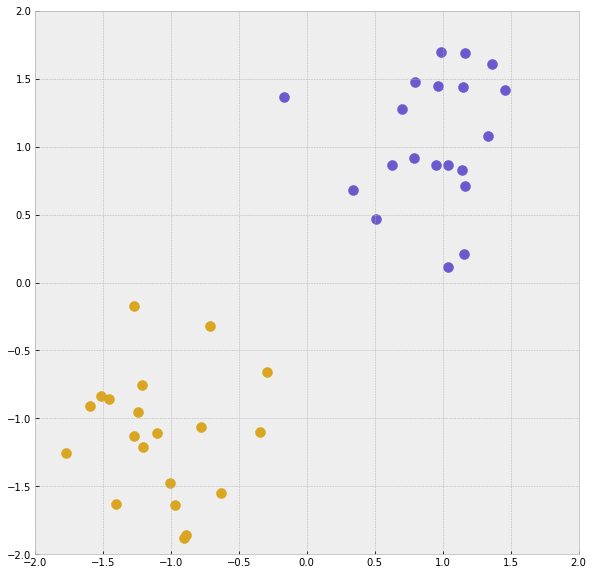

In [4]:
def plot_scatter(g1,g2,ax):
    p = ax.scatter(*g1.T, color='goldenrod',s=100)
    p = ax.scatter(*g2.T, color='slateblue',s=100)
    ax.set_xlim(-2,2); ax.set_ylim(-2,2);
        
## create some data
np.random.seed(42)
n = 20
g1 = np.random.multivariate_normal((-1,-1), np.eye(2)*0.2, n)
g2 = np.random.multivariate_normal((1,1), np.eye(2)*0.2, n)

## plot it
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,aspect='equal')
plot_scatter(g1,g2,ax)

X = np.vstack([g1,g2])
y = np.zeros(X.shape[0])
y[:20]=-1
y[20:] = 1
print(X.shape)

(40, 2)
(40,)
evaluated as: [ 2.90906943  2.9559589 ], cos_sim: [[ 0.96886393]]
evaluated as: [ 0.  0.], cos_sim: [[ 0.96886393]]
evaluated as: [-1.62185512 -1.62185512], cos_sim: [[ 0.96886393]]


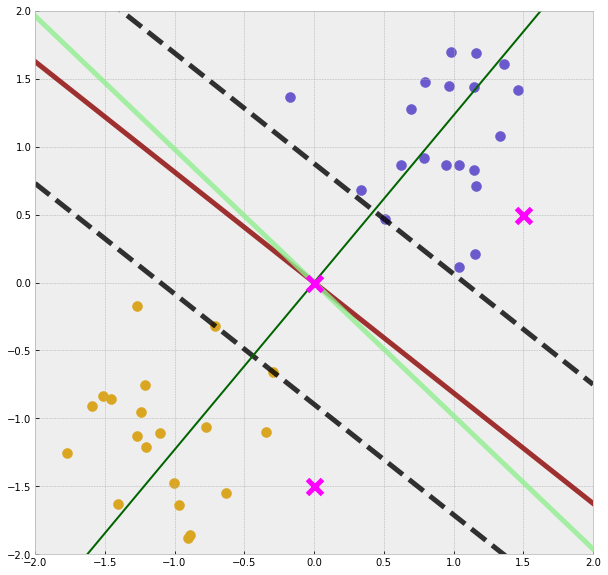

In [5]:
from sklearn.linear_model import LogisticRegression

def draw_line(xvals,w,ax,label=None,color='DarkRed'):                                                                                                                                                                              
    w0, w1, w2 = w                                                                                                                                                                                                 
    p = ax.plot(xvals,(-w1*xvals)/w2,linewidth=5.0,color=color,label=label,alpha=0.8)                                                                                                                           
    #(-w0-w1*xvals)/w2
    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)    
plot_scatter(g1,g2,ax) 
xlims = [-2,2]

## find a max-margin hyperplane                                                                                            
print(X.shape)
print(y.shape)
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

## draw the decision boundry
w = clf.coef_[0]
w0 = clf.intercept_[0]

xvals = np.linspace(-2,2,10)                                                                                                                                                                           
draw_line(xvals,[clf.intercept_[0],w[0],w[1]],ax)

## draw the margins
a = -w[0] / w[1]
b = clf.support_vectors_[0]
lower = a * xvals + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
upper = a * xvals + (b[1] - a * b[0])

p = ax.plot(xvals,lower,'k--',linewidth=5,alpha=0.8)
p = ax.plot(xvals,upper,'k--',linewidth=5,alpha=0.8)

w1, w2 = w  
x0,x1 = -2,2
x_1 = 0.75 * xlims[1]
y0 = (w2*x0)/w1
y1 = (w2*x1)/w1
p = ax.plot([x0, x1], [y0, y1], c='DarkGreen',label='normal vector')

## plot a logistic regression line
clf1 = LogisticRegression().fit(X, y)
w1 = clf1.coef_[0]
#print(w1)

#logreg_clf.intercept_[0] + coefs[0] * x) / coefs[1]
draw_line(xvals,[clf1.intercept_[0],w1[0],w1[1]],ax,color='LightGreen')

## create a new point
for new_x in [(1.5,0.5),(0.0,0.0),(0.0,-1.5)]:
    new_x1,new_x2 = new_x
    p = ax.plot([new_x1],[new_x2],marker='x',ms=15,color='magenta',markeredgewidth=5)
    value = new_x1*w1 + new_x2*w2
    _y1 = np.array([y0,y1])
    _x2 = np.array([new_x1,new_x2])
    y0 = (w2*x0)/w1
    y1 = (w2*x1)/w1
    #cos_sim = np.dot(_x,_y)/(np.linalg.norm(_x)*np.linalg.norm(_y))
    print("evaluated as: %s, cos_sim: %s"%(value,cos_sim))
